# Лабораторная работа № 1
# Задача о падении тела. Построение графиков функций

### Игнатьева Ксения, 21.02

# Задание 1.1. Задача о падении тела

## Этап 1. Импортирование модулей

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$.
**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы
тяжести $${\bf F} = m (0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.


Импортируем модуль `math` с математическими функциями из стандартной
библиотеки:


In [387]:
import math

Доступ к инструментам модуля осуществляется с применением синтаксиса
уточнения `<имя модуля>.<имя атрибута>` . Например

In [388]:
math.sin(math.pi/2)

1.0

Импортируем расширение `numpy` и создадим псевдоним `np` для доступа к
инструментам модуля, не используя имя `numpy`


In [389]:
import numpy as np 

Расширение numpy основано на работе со структурой данных массив ( `ndarray` ).
Массив ( `ndarray` ) не является встроенным типом данных Python, он является
базовым типом расширения numpy .
Импортируем модуль `pyplot` из пакета `matplotlib` для построения графиков.
Для этого примененим синтаксис `<имя пакета>.<имя модуля в пакете>` и
создадим псевдоним имени модуля `plt`


In [390]:
import matplotlib.pyplot as plt


Импортируем модуль `constants` из пакета расширений `scipy` с псевдонимом
`const` . Модуль `constants` предоставляет доступ к значениям физических
констант

In [391]:
import scipy.constants as const


Импортируем модуль `sympy` для символьных вычислений в Python


In [392]:
import sympy


## Этап 2. Создание переменных

**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания ( `=` ) записывается переменная, справа — выражение,
результатом вычисления которого является объект: `переменная = объект` . Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
`first_variable = 1` . Объявлять переменные перед их инициализацией не нужно.
После присваивания всякий раз, когда переменная появляется в коде, она
заменяется на объект, на который ссылается. Нельзя использовать переменную,
которой не присвоено значение

In [393]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движения
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета


Отобразить значение переменной можно, указав ее имя в ячейке ввода в
последней строке или с использованием встроенной функции `print`


In [394]:
h_start # переменная не отобразится
h_end # переменная отобразится


3.0

In [395]:
print(h_start, h_end)

1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:

In [396]:
g = const.g
g, const.unit('standard acceleration of gravity')


(9.80665, 'm s^-2')

Приведем несколько примеров физических констант из модуля
constants пакета расширений `scipy` .


In [397]:
print( const.atm)

101325.0


In [398]:
print(const.year)

31536000.0


Временной отрезок [0,T] представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке [0,T] с шагом
0,01 двумя способами: на основе встроенного типа список ( `list` ) и на основе
массива ( `ndarray` ) из расширения `numpy`


In [399]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step) 

спецификации функций: 
`range`: возвращает неизменяемую последовательность чисел, которую можно легко конвертировать в списки, кортежи, множества и т.д.
`arange`: Возврат равномерно расположенных значений в пределах заданного интервала.



In [400]:
print(list(range(-5,7,2)))


[-5, -3, -1, 1, 3, 5]


In [401]:
print(np.arange(0, 15, 2))  

[ 0  2  4  6  8 10 12 14]


## Этап 3. Определение функции перемещения и нахождение угла запуска тела


Полагаем, что начало прямоугольной декартовой системы координат соответствует уровню земли.  
Тогда в начальный момент движения тела $ t = 0 $ имеем, что  

$s_x(0) = 0, \quad s_y(0) = h_{start}.$

Для построения функции перемещения $ (s_x(t), s_y(t)) $ воспользуемся вторым законом Ньютона  

$
ma = \mathbf{F},
$
где $ m $ — масса тела, ускорение движения тела $ \mathbf{a} = (s''_x(t), s''_y(t)) $  
и приложенная сила $ \mathbf{F} = m(0, -g) $.  
В результате имеем два уравнения:

$
s''_x(t) = 0, \quad s''_y(t) = -g.
$

На основании уравнений с учетом начальных условий можно записать аналитический вид для функций $ s_x(t) $ и $ s_y(t) $  

$
s_x(t) = s_x(0) + v0_{x} t = 0 + v0_{x} t,
$

$
s_y(t) = s_y(0) + v0_{y} t - \frac{g}{2} t^2 = h_{start} + v0_{y} t - \frac{g}{2} t^2,
$

где $ \mathbf{v_0} = (v0_{x}, v0_{y}) $ обозначает неизвестную скорость движения тела  
в начальный момент времени $ t = 0 $.


При движении тела, брошенного под углом к горизонту, его траекторию можно разложить на две составляющие: горизонтальную (по оси \(Ox\)) и вертикальную (по оси \(Oy\)).  

Начальная скорость тела образует некоторый угол с горизонталью, поэтому её можно представить в виде двух проекций: горизонтальной (\( v_{0x} \)) и вертикальной (\( v_{0y} \)). Так как вдоль оси \(Ox\) отсутствует влияние силы тяжести, горизонтальная скорость остается неизменной, а движение по этой оси является равномерным. Таким образом, координата тела в этом направлении изменяется по следующему закону:  

$$
s_x = s_x(0) + v_{0x} t
$$  

То есть путь, пройденный телом вдоль горизонтальной оси, вычисляется как \( v_{0x} t \).  

Вдоль оси \(Oy\) на движение влияет ускорение свободного падения \( g \), направленное вниз. Это делает движение равноускоренным: начальная вертикальная скорость \( v_{0y} \) сначала увеличивает высоту, но затем тело начинает снижаться под действием силы тяжести. Формула для координаты по оси \(Oy\) выглядит так:  

$$
s_y = s_y(0) + v_{0y} t - \frac{g}{2} t^2
$$  

На начальном этапе движения координаты тела принимают значения \( s_x(0) = 0 \) и \( s_y(0) = h_{\text{start}} \). Если же отсчет времени начать не с \( t_0 \), а с некоторого момента \( t' \), то уравнения движения сохранятся, но изменятся начальные координаты:  

- Начальное положение вдоль оси \(Ox\) будет  

$$
s_x(0) = v_{0x} t'
$$  

- Координата по оси \(Oy\) примет значение  

$$
s_y(0) = h_{\text{start}} + v_{0y} t' - \frac{g}{2} t'^2
$$  

Таким образом, движение тела можно рассматривать как сумму двух независимых процессов: равномерного перемещения вдоль оси \(Ox\) и равноускоренного движения по оси \(Oy\)

In [402]:
v0_x = s_end/T
v0_x

1.6666666666666667

Из условия задачи имеем, что $s_{y}(T)=h_{end}$ . Из этого соотношения находим значение для 
$v_{0y}$

In [403]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела $\alpha$ определяем из соотношения $tan \alpha=\frac{v_{0y}}{v_{0x}}$

In [404]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид

In [405]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [406]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

## Этап 4. Построение графика траектории движения тела

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений $x$-координат точек графика функции и последовательность соответствующих значений $y$-координат точек
графика функции.</br> На этапе 2 было создано две последовательности равномерно распределенных чисел на отрезке $[0,T]$ с шагом 0.01 для переменной времени $t$

In [407]:
t_list, t_array; 

Определим списки чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в моменты времени `t_list` с использованием
формул, полученных на этапе 3:

In [408]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в момент времени `t_array` :

In [409]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

Арифметические действия с массивом `ndarray` выполняются **поэлементно** без доп синтаксика </br>
Строим график траектории движения тела, используя инструменты модуля `pyplot` пакета `matplotlib`

(0.0, 5.0, 0.0, 14.0)

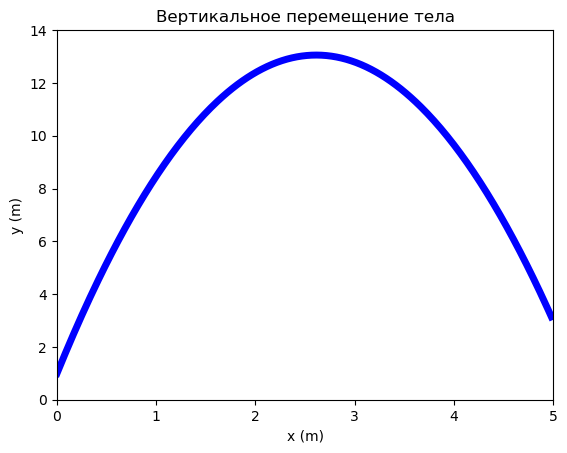

In [410]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])

При вызове функции `plot` из `pyplot` можно использовать как списки, так и
массивы.

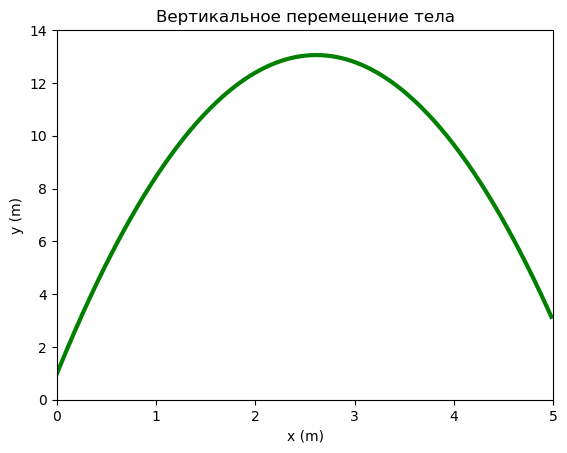

In [411]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

# Задача 1.2. Определение момента касания телом 

Выполнение задания осуществите на основе двух подходов.


*Подход 1* (**точное решение**): 
время касания телом земли находим как точное решение уравнения $ s_y(t) = 0 $;

*Подход 2* (**приближенное решение**)

- Построить последовательность $ s_y $ на временном отрезке $ [0, t_{stop}] $,  
  чтобы момент касания тела земли $ t^* $ попадал в выбранный отрезок,  
  т.е. $ t^* \in [0, t_{stop}] $.  
  Отметим, что $ t_{stop} > T $, где значение $ T $ задается в Задании 1.1.

- Найти в построенной последовательности $ s_y $ два соседних элемента  
  последовательности, значения которых меняют знак.  
  Т. е. найти значение индекса $ k $, для которого $ s_y[k] s_y[k+1] < 0 $.  
  Это будет означать, что  
 $
  0 \in (s_y[k], s_y[k+1]).
  $

- Построить прямую линию $ s_{lin}(t) $, проходящую через две точки  
  $ (t[k], s_y[k]) $ и $ (t[k+1], s_y[k+1]) $  
  и найти значение $ t^* \in (t[k], t[k+1]) $ из условия  
  $
  s_{lin}(t^*) = 0.
  $
  Найденное значение $ t^* $ будет соответствовать точке $ (t^*, 0) $  
  на прямой $ s_{lin}(t) $.  
  **$\color{red}\text{Привести}$** в документе формулы для прямой $ s_{lin}(t) $  
  и для вычисления $ t^* $.

**$\color{red}\text{Сравнить}$** точное решение (**Подход 1**) и приближенное решение (**Подход 2**), вычислив относительную ошибку.


Рассмотрим *Подход 1* выполнения Задания 1.2. о $\color{red}\text{нахождении}$ момента времени касания тела земли

Для решения алгебраического уравнения $s_{y}(t) = 0$ воспользуемся функцией `solve` из модуля `sympy`, которая предназначена для решения алгебраических уравнений и систем уравнений.  
Для выполнения функции `solve` предварительно с помощью функции `symbols` необходимо создать **символьную переменную**, относительно которой будет определено уравнение.


In [412]:
t = sympy.symbols('t')
result = sympy.solve(h_start + v0_y * t - g * t**2 / 2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [413]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

Cпецификации функций `symbols` и `solve` из модуля `sympy`: </br>
**Функция** `symbols` позволяет создавать переменные в символьном виде, которые затем можно использовать в математических выражениях и уравнениях</br>
**Функция** `solve(equation, variable)`
применяется для нахождения решений алгебраических уравнений относительно указанной переменной

In [414]:
x=sympy.symbols('x')
y=sympy.solve(x**2-3*x-7,x)
print(y)

[3/2 - sqrt(37)/2, 3/2 + sqrt(37)/2]


Задание 1.2 на основе *Подхода 2*:
### Задание 1.2, модифицированный вариант

В данном задании необходимо определить индекс $ k $, при котором происходит смена знака в последовательности $ s_y $. Для этого используем цикл for в сочетании с enumerate. После этого вычисляем $ t^* $ согласно сформулированной формуле.

#### Разложение начальной скорости на составляющие:
- Горизонтальная компонента: $ v0_x = v0 \cos(\theta) $
- Вертикальная компонента: $ v0_y = v0 \sin(\theta) $

#### Определение времени полёта с использованием закона движения по вертикали:
Уравнение движения:
$$ s_y = h_{init} + v0_y \cdot t - \frac{1}{2} g t^2 $$

При достижении земли $ s_y = 0 $, решаем квадратное уравнение относительно $ t $:
$$ t = \frac{v0_y + \sqrt{v0_y^2 + 2gh}}{g} $$

Так как время не может быть отрицательным, берём только положительный корень.

#### Вычисление дальности полёта:
Подставляем $ t $ в уравнение движения по горизонтали:
$$ x = v0_x \cdot t $$

Теперь найдём время падения другим методом.

1. Создаём список значений времени с шагом $ \Delta t $.
2. Вычисляем $ s_y $ в каждый момент времени.
3. Находим момент, когда $ s_y $ меняет знак.
4. Используем линейную интерполяцию для уточнения времени падения.

#### Интерполяция для точного нахождения момента приземления:
Уравнение прямой через точки $ (x_1, y_1) $ и $ (x_2, y_2) $:
$$ s = mt + b $$

Где:
- Наклон (угловой коэффициент) $ m $:
  $$ m = \frac{s[k+1] - s[k]}{t_{list}[k+1] - t_{list}[k]} $$
- Свободный член $ b $:
  $$ b = s[k] - m \cdot t_{list}[k] $$

Рассчитанное время падения:
$$ t_{fall} = -\frac{b}{m} $$

#### Определение относительной ошибки:
Относительная ошибка второго метода:
$$ \varepsilon = \left| \frac{t_{exact} - t_{fall}}{t_{exact}} \right| \times 100 \% $$

In [415]:
t_max = 4.0
delta_t = 0.01
time_values = [i * delta_t for i in range(int(t_max / delta_t))]
heights = [h_start + v0_y * t - g * t**2 / 2 for t in time_values]

# Определяем момент смены знака:
for index, height in enumerate(heights):
    if height * heights[index + 1] < 0:  # Проверяем, где меняется знак
        k = index
        break

In [416]:
t1, t2 = time_values[k], time_values[k+1]
s1, s2 = heights[k], heights[k+1]

k_coef = (s2 - s1) / (t2 - t1)  # Вычисляем коэффициент наклона
b_intercept = s1 - k_coef * t1  # Вычисляем свободный член

t_ground = -b_intercept / k_coef  # Получаем время падения
print(t_ground)

# Оценка относительной ошибки:
error_ratio = abs((t_star_exact - t_ground) / t_star_exact)
print(error_ratio * 100, '%')

3.1996994995400283
2.79132127839983e-5 %


Уравнение прямой через две точки $ (x_1, y_1) $ и $ (x_2, y_2) $:  

$$
s = mt + b
$$

где:  

- **Наклон (угловой коэффициент) $ m $**:  

$$
m = \frac{s[k+1] - s[k]}{t_{\text{liststop}}[k+1] - t_{\text{liststop}}[k]}
$$

- **Свободный член $ b $**:  

$$
b = s[k] - m \cdot t_{\text{liststop}}[k]
$$


# Задача 1.3. Построение секущей, касательной к нормали графику функции

$\color{red}{\text{Построим}}$ в одной графической области:
- график траектории движения тела $(s_x(t), s_y(t))$ для $ t \in [0, T] $ из Задания 1.1;
- График секущей прямой к траектории движения тела, проходящей через начальную точку при $ t = 0 $ и конечную точку при $ t = T $;
- график касательной прямой к траектории движения тела в начальной точке при $ t = 0 $;
- график нормальной прямой к траектории движения тела в начальной точке при $ t = 0 $. </br>
Построение графиков функций осуществляется по координатам точек графика. Для построения графиков прямых линий (секущая, касательная, нормаль) используйте только две точки

Подготовим необходимые данные для построения секущей прямой к траектории движения тела.  

Воспользуемся *векторно-параметрическим уравнением прямой* для заданной точки $ p_{start} $, лежащей на прямой, и заданного направляющего вектора $ a $  

$$
p(t) = p_{start} + at.
$$  

Направляющий вектор можно определить как $ a = p_{end} - p_{start} $, где точка $ p_{end} $ лежит на прямой и отлична от точки $ p_{start} $.  

Введем новые переменные для описания начальной точки $ p_{start} $ и конечной точки $ p_{end} $ через их координаты. Для новых переменных используем тип массив (`ndarray`) из `numpy`. Представление координат точек в виде массивов иногда эффективнее, чем представление в виде списков, для дальнейшей работы с координатами.


In [417]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [418]:
a = p_end-p_start

Для построения графика прямой достаточно задания двух точек, лежащих на
прямой:

In [419]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной
графической области:

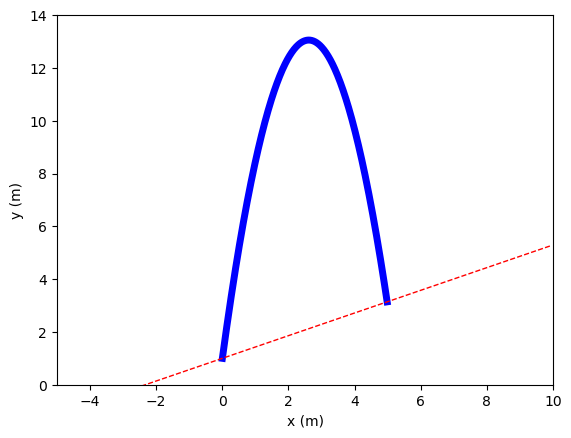

In [420]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-5, s_end+5, 0, h_end+11]);

### Определение углового коэффициента  

Для нахождения касательной прямой к траектории движения тела в момент времени $t = 0$ рассматривается уравнение прямой, проходящей через точку $p_{\text{start}}(x_{\text{start}}, y_{\text{start}})$ с угловым коэффициентом $k$:  

$$
y = k(x - x_{\text{start}}) + y_{\text{start}}
$$

Значение $k$ определяется как производная $s'(t)$ в момент $t = 0$. Учитывая, что траектория задана параметрически как $(x(t), y(t))$, коэффициент $k$ можно выразить следующим образом:  

$$
k = \frac{dy}{dx} = \frac{y'(t)}{x'(t)}
$$

при $t = 0$.  

### Уравнение нормальной прямой  

Нормальная прямая строится таким образом, чтобы она была перпендикулярна касательной и проходила через ту же самую точку $p_{\text{start}}$. Для её построения используется свойство перпендикулярности прямых:  

Если две прямые пересекаются под углом 90 градусов, то произведение их угловых коэффициентов равно $-1$, откуда следует:  

$$
k_{\text{normal}} = -\frac{1}{k}
$$

Соответственно, уравнение нормали можно записать в следующем виде:  

$$
y = k_{\text{normal}} (x - x_{\text{start}}) + y_{\text{start}}
$$

In [421]:
x_position=v0_x*t
y_position=h_start+v0_y*t+g*t**2/2
t = sympy.symbols('t')
# Вычисление производных
dx_dt = sympy.diff(x_position, t)
dy_dt = sympy.diff(y_position, t)

# Определение углового коэффициента
slope = dy_dt.subs(time, 0) / dx_dt.subs(t, 0)

# Построение точек касательной
tangent_start = np.array([s_x_array[0], s_y_array[0]])
tangent_end = np.array([s_x_array[0] + 1, slope + s_y_array[0]])
tangent_points = [tangent_start + (tangent_end - tangent_start) * t for t in [-1, 2]]
tangent_points = np.array(tangent_points)

# Построение точек нормали
normal_start = np.array([s_x_array[0], s_y_array[0]])
normal_end = np.array([s_x_array[0] + 1, -1 / slope + s_y_array[0]])
normal_points = [normal_start + (normal_end - normal_start) * t for t in [-10, 9]]
normal_points = np.array(normal_points)

In [422]:
slope

9.22598500000000

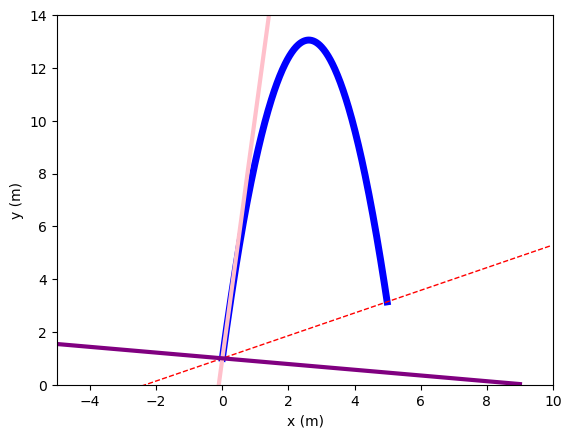

In [423]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.plot(tangent_points[:,0], tangent_points[:,1], color='pink', lw=3)
plt.plot(normal_points[:,0],normal_points[:,1],color='purple',lw=3)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

## Задача 1.4. Построение графиков функций

 #### 1. *Декартов лист*

 a) *полярная система*

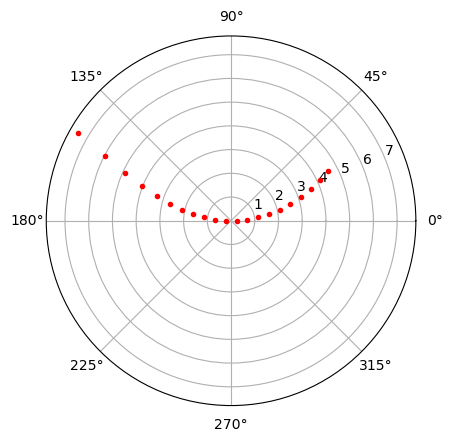

In [424]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-np.pi/6, np.pi/6, 0.05)
a = 3
r = (3 * a * np.sin(phi) * np.cos(phi)) / (np.sin(phi)**3 + np.cos(phi)**3)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')

 ) *полярная система*

Text(0, 0.5, 'y')

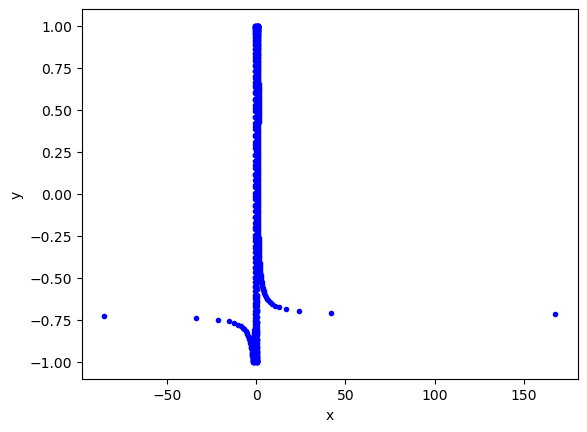

In [425]:
t = np.arange(-3, 3, 0.01)
x = (3 * t**2 + 1) / (3 * t**3 + 1)
y = np.sin(t**3 / 3 + t)
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')

#### 2. *Роза*

 a) *полярная система*

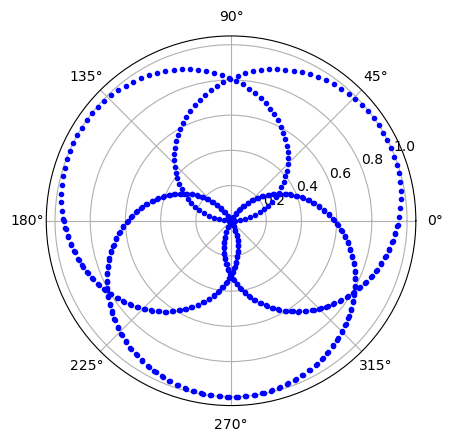

In [426]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-4*np.pi, 4*np.pi, 0.05)
a, m, n = 1, 3, 5
r = a * np.sin(m / n * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'b.')

 б) *декартовая система*

Text(0, 0.5, 'y')

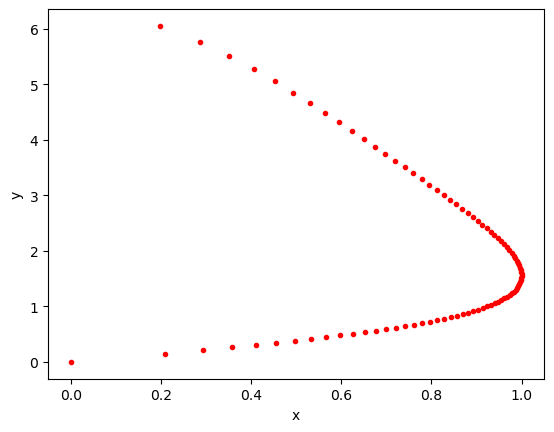

In [427]:
t = np.arange(-1, 1, 0.022)
x = np.sqrt(1 - t**2)
y = np.tan(np.sqrt(1 + t))
plt.figure()
plt.plot(x, y, 'r.')
plt.xlabel('x'); plt.ylabel('y')

#### 3. *Кардиоида*

 a) *полярная система*

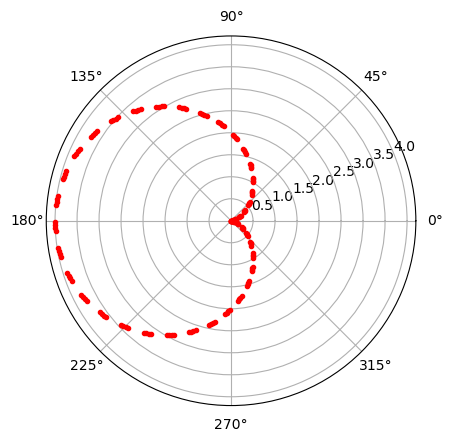

In [428]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-4*np.pi, 4*np.pi, 0.15)
a=1
r = 2 * a * (1 - np.cos(phi))
plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')

 б) *декартовая система*

Text(0, 0.5, 'y')

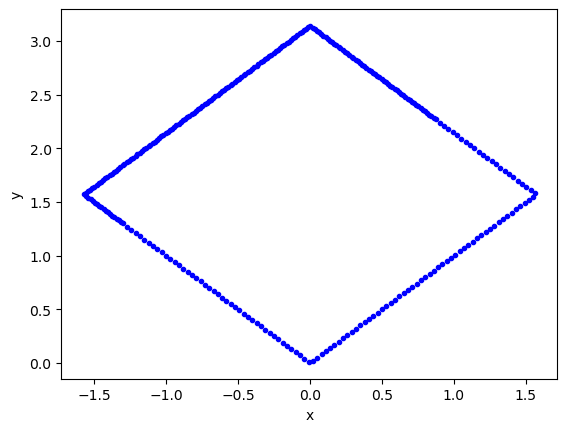

In [429]:
t = np.arange(-4, 5, 0.03)
x = np.arcsin(np.sin(t))
y = np.arccos(np.cos(t))
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')

#### 4. *Роза*

 a) *полярная система*

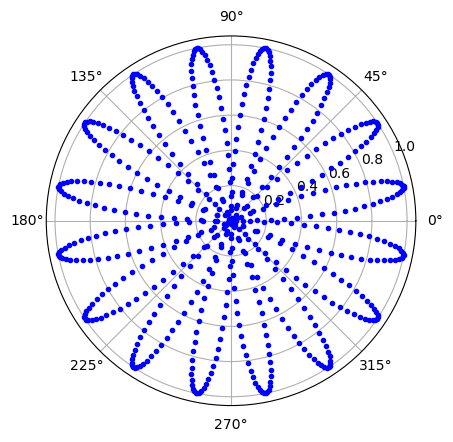

In [430]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-np.pi, np.pi, 0.01)
k = 4
r = a * np.sin(2 * k * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'b.')

 б) *декартовая система*

Text(0, 0.5, 'y')

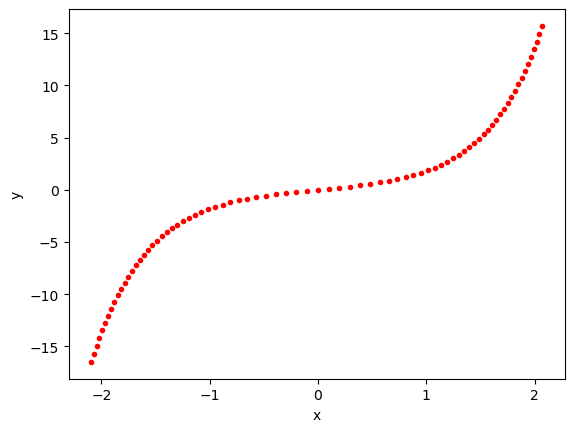

In [431]:
t = np.arange(-4, 4, 0.1)
x = np.log(t + np.sqrt(t**2 + 1))
y = t * np.sqrt(t**2 + 1)
plt.figure()
plt.plot(x, y, 'r.')
plt.xlabel('x'); plt.ylabel('y')

#### 5. *Роза*

 а) *полярная система*

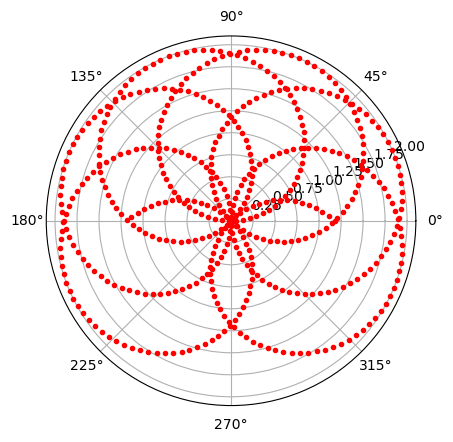

In [432]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-4*np.pi, 4*np.pi, 0.05)
a=2
m, n = 4, 5
r = a * np.sin(m / n * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')

 б) *декартовая система*

Text(0, 0.5, 'y')

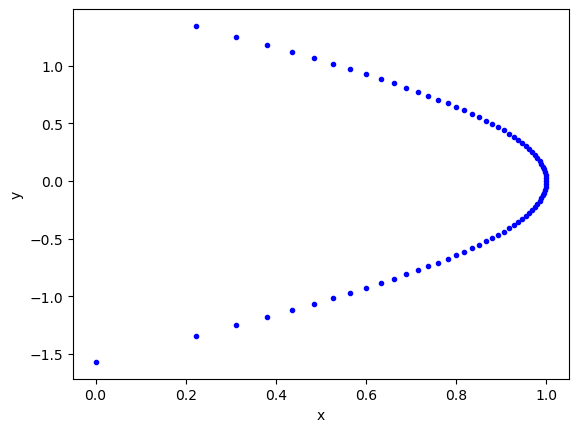

In [433]:
t = np.arange(0, 2, 0.025)
x = np.sqrt(2 * t - t**2)
y = np.arcsin(t - 1)
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')

#### 6. *Улитка Паскаля*

 а) *полярная система*

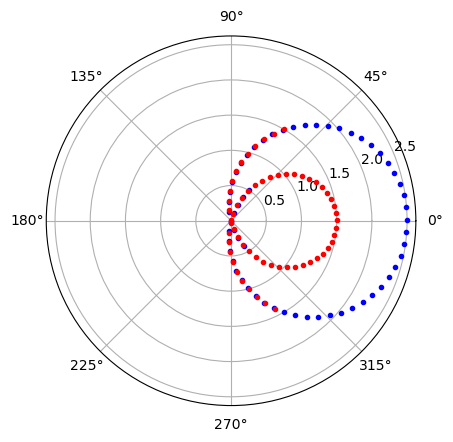

In [434]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-2*np.pi/3, 2*np.pi/3, 0.07)
a = 1
l = 0.5
r1 = 2 * a * np.cos(phi) + l
r2 = 2 * a * np.cos(phi) - l
plt.plot(phi + (r1 < 0) * np.pi, abs(r1), 'b.')
plt.plot(phi + (r2 < 0) * np.pi, abs(r2), 'r.')

 б) *декартовая система*

Text(0, 0.5, 'y')

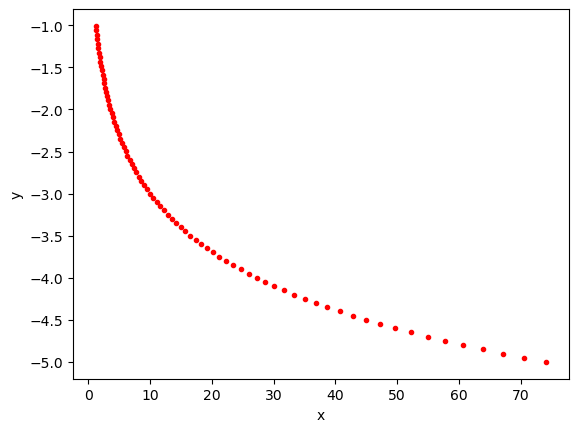

In [435]:
t = np.arange(-5, -1, 0.05)
x = 1 / np.tan(2 * np.exp(t))
y = np.log(np.tan(np.exp(t)))
plt.figure()
plt.plot(x, y, 'r.')
plt.xlabel('x'); plt.ylabel('y')

#### 7. *Конхоида Никомеда*

 а) *полярная система*

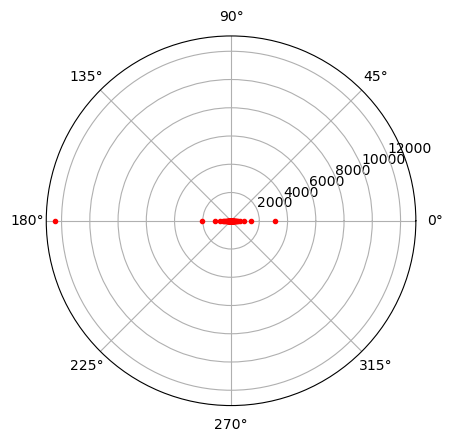

In [436]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-np.pi/6, np.pi/6, 0.002)
a = -5
l = 0.5
r = a / np.sin(phi) + l
plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')

 б) *декартовая система*

Text(0, 0.5, 'y')

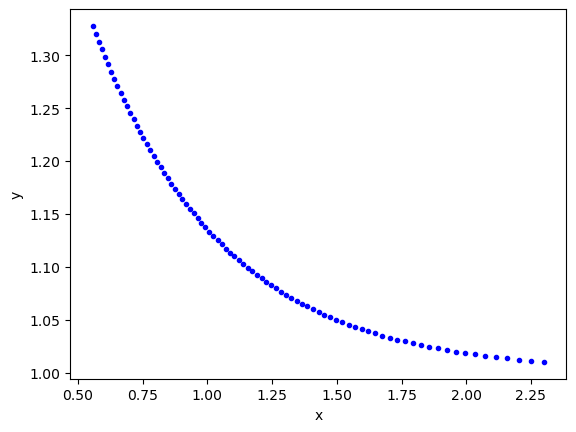

In [437]:
t = np.arange(0.1, np.pi/6, 0.005)
x = np.log(1 / np.tan(t))
y = 1 / np.cos(t)**2
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')

#### 8. *Роза*

 а) *полярная система*

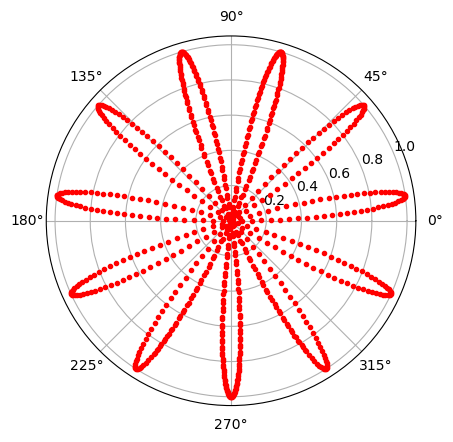

In [438]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-2*np.pi/3, 2*np.pi/3, 0.005)
a=1
k = 5
r= a * np.sin((2 * k + 1) * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')

 б) *декартовая система*

Text(0, 0.5, 'y')

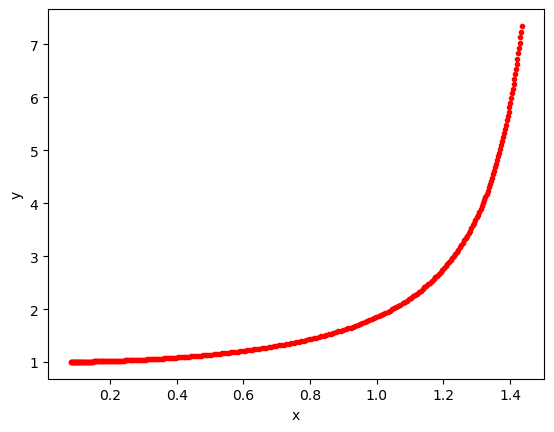

In [439]:
t = np.arange(-5, 4, 0.03)
x = np.arctan(np.exp(t/2))
y = np.sqrt(np.exp(t) + 1)
plt.figure()
plt.plot(x, y, 'r.')
plt.xlabel('x'); plt.ylabel('y')

#### 9. *График 9*

 а) *полярная система*

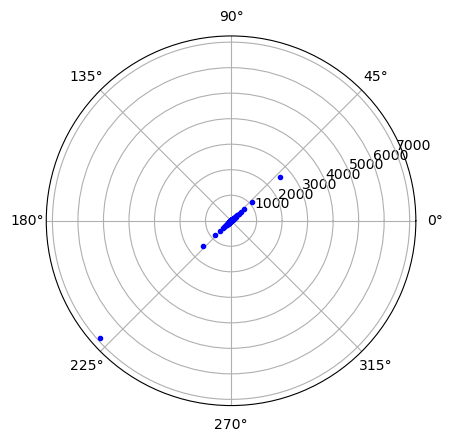

In [440]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-2, 2, 0.001)
a=4.2
m=2
n=-3
r = a / (m + n * np.sin(phi))
plt.plot(phi + (r < 0) * np.pi, abs(r), 'b.')

 б) *декартовая система*

Text(0, 0.5, 'y')

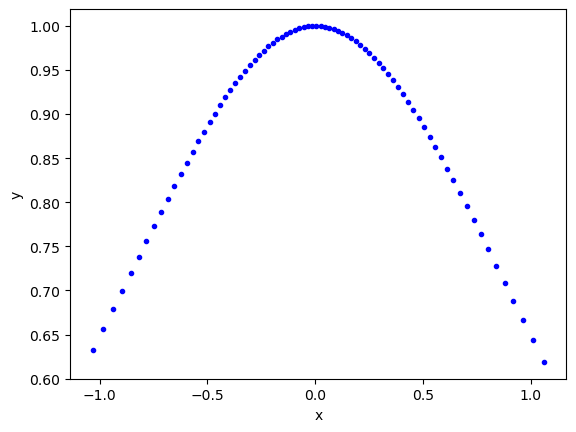

In [441]:
t = np.arange(-np.pi/4,np.pi/4, 0.02)
x = np.log(np.sqrt((1 - t) / (1 + t)))
y = np.sqrt(1 - t**2)
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')

#### 10. *Строфоида*

 а) *полярная система*

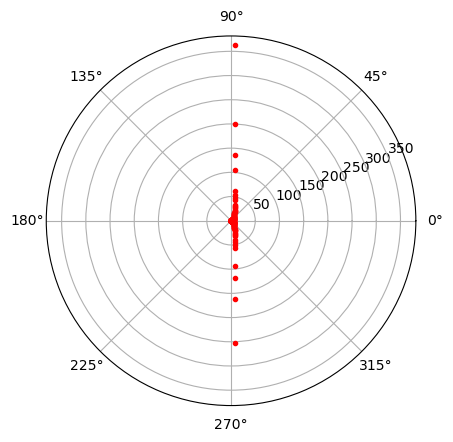

In [442]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-4*np.pi, 4*np.pi, 0.1)
phi = phi[np.abs(np.cos(phi)) > 1e-3] 
a=3.7
r = a / np.cos(phi) + a * np.tan(phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')

 б) *декартовая система*

Text(0, 0.5, 'y')

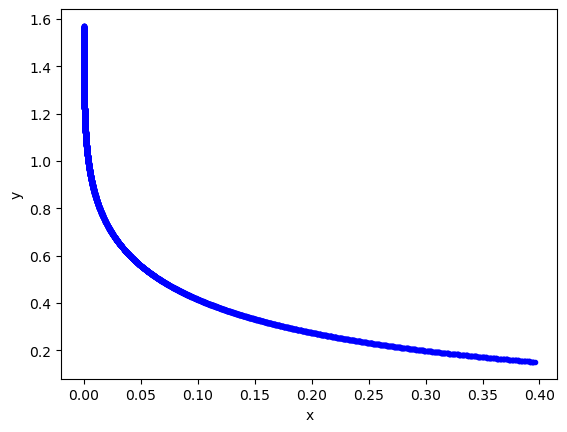

In [443]:
t = np.arange(-0.86, 0.86, 0.0005)
x = np.log(1 / np.sqrt(1 - t**4))
y = np.arcsin((1 - t**2) / (1 + t**2))
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')

# Контрольные вопросы

## ЛБ01 Часть 1. Введение в язык программирования Python

1.
Python — это высокоуровневый интерпретируемый язык программирования общего назначения, разработанный голландским программистом Гвидо ван Россумом в конце 1980-х годов. Основная цель его создания заключалась в том, чтобы предложить простой и удобный для изучения язык. Разработка велась в Центре математики и информатики (CWI) в Нидерландах. Первая официальная версия Python (0.9.0) была представлена в феврале 1991 года.

В 2000 году вышла вторая версия Python (2.0), в которой были добавлены сборщик мусора и возможность использования списковых включений. В 2008 году был выпущен Python 3.0, который избавился от устаревших решений, но при этом потерял совместимость с версией 2.x.

На данный момент Python входит в число самых популярных языков программирования, что подтверждают различные рейтинги:

RedMonk (январь 2023): JavaScript, Python, Java, PHP, C#, CSS.
TIOBE (январь 2024): Python, C, C++, Java, C#.
PYPL (январь 2024): Python, Java, JavaScript, C/C++, C#.
Многие разработчики до сих пор используют как Python 2.x, так и Python 3.x, поскольку не все библиотеки были адаптированы к новой версии.

2. Основные особенности Python:

Python является бесплатным языком с открытым исходным кодом.
Он поддерживает несколько подходов к программированию.
Python — язык высокого уровня.
Интерпретируемый: код сначала преобразуется в байт-код, который затем выполняется интерпретатором, минуя стадию компиляции в машинный код.
Поддержка различных платформ позволяет запускать программы без изменений на разных операционных системах.
Python автоматически управляет памятью, выделяя и освобождая её по мере необходимости.
Обеспечивает быструю разработку за счёт простого синтаксиса и динамической типизации.
Применяется в разных сферах, от веб-разработки до научных вычислений.
Python легко интегрируется с другими языками (C, C++, Java, .NET).
Поддерживает многопоточное и многопроцессорное программирование.
У языка большое сообщество и обширная документация.
Для различных задач существуют специализированные библиотеки (Django, Flask, Selenium, PyAutoGUI, Scapy, Pwntools и т. д.).
3.
Python поддерживает разные подходы к программированию:

Процедурный стиль, основанный на использовании последовательности инструкций.
Функциональный стиль, при котором функции работают без побочных эффектов.
Объектно-ориентированный стиль, использующий классы и объекты.
4.
Программы на Python сначала транслируются в байт-код, после чего исполняются интерпретатором. В отличие от таких языков, как C и C++, Python не требует предварительной компиляции в машинный код.

5.
Один из главных недостатков Python — относительно низкая скорость выполнения программ. Это связано с тем, что код интерпретируется, а не компилируется напрямую в машинные инструкции. Однако Python выигрывает в скорости разработки благодаря лаконичному синтаксису и автоматическому управлению памятью.

6. *Python* задействован в разных предметных областях:
- системное программирование,
- программирование GUI,
- программирование для баз данных,
- в веб-программировании на *Python* пишут в основном бэкенд,
- в программировании для мобильных устройств *Python* используется редко,

- численное и научное программирование:
  - визуализация данных,
  - обработка изображений,
  - обработка естественного языка,
  - анализ данных,
  - разработка алгоритмов искусственного интеллекта,
  - разработка компьютерных игр.
*Python в реальных продуктах*:
- поисковая система Google,
- служба YouTube почти полностью написана на *Python*,
- серверная часть Instagram написана на *Python*,
- служба хранилища Dropbox почти полностью написана на *Python*,
- в производстве анимационных фильмов Pixar,
- серверная часть Netflix.
  
7.
Программы на Python состоят из модулей. Каждый модуль представляет собой отдельный файл с кодом. Один из таких файлов выполняет роль главного модуля (или сценария), с которого начинается работа программы.

Модули содержат операторы и выражения, которые можно группировать в функции и классы, обеспечивая структурированность кода.

8.
Основной синтаксис Python включает зарезервированные слова, которые определяют ключевые конструкции языка. Они находятся в модуле builtins.Python не требует явного объявления типов переменных — тип объекта определяется автоматически во время выполнения.

Отличительной особенностью синтаксиса является использование отступов для обозначения структуры кода. Это повышает читаемость и избавляет от необходимости использовать фигурные скобки {}.

Дополнительные особенности синтаксиса:

Двоеточие (:) используется для обозначения начала блока кода.
Точка с запятой (;) в конце строки не обязательна.
Скобки в условных выражениях тоже можно не использовать.
9.
Для автоматизированного тестирования Python предлагает удобные инструменты, такие как pytest. Этот фреймворк позволяет писать и запускать тесты, а также расширять его функциональность с помощью плагинов.

Один из таких плагинов, pep8, проверяет соответствие кода стилю PEP 8, что помогает поддерживать читаемость и единообразие программ.

Основные принципы Python делают акцент на простоте, удобочитаемости и логичности кода.

10.
JupyterLab — это веб-приложение, предоставляющее удобную среду разработки с интерфейсом в браузере. Оно позволяет работать с несколькими Jupyter Notebook, кодом и данными одновременно.

JupyterLab распространяется свободно, его исходный код доступен для модификации. Этот инструмент входит в состав проекта Jupyter, разработанного для интерактивных вычислений и работы с различными языками программирования.

## ЛБ01 Часть 2. Работа с ячейками в документе .ipynb

1. Ячейка Code cells – это сущность документа .ipynb, которая содержит произвольное количество строк кода на языке Python, предназначена для выполнения строчек кода, и написания самой программы, результат выполнения ячейки отображается под ячейкой кода.</br> Ячейка Markdown cell – это сущность документа .ipynb, которая содержит содержит текст, отформатированный с использованием языков разметки Markdown и Latex, предназначена для описания программы, добавления комментариев и оформления общего вида структуры файла, результат выполнения ячейки отображается на месте
2. - добавления ячейки перед текущей, клавиша $a$
   - добавления ячейки после текущей, клавиша $b$
   - удалить ячейку, дважды нажать на клавишу $d$
   - копирование ячейки, клавиша $C$
   - вставка ячейки, клавиша $V$
   - вырезание ячейки, клавиша $X$
3. В текстовой ячейке используются два языка разметки, для работы с текстом (встроенный язык разметки Markdown  для форматирования простого текста), с математическими формулами (встроенный язык разметки Latex), с визуализацией, с интерактивными элементами управления и др.
A)
1. кликнуть сбоку по ячейке 
2. клавиша $a$
3. клавиша $b$
4. клавиша $y$
5. клавиша $m$
6. о дважды щелкнуть мышью по текущей ячейке или нажать клавишу ввод $Enter$
7. $Esc$
8. клавиша $C$
9. клавиша $V$
10. клавиша $X$
11. дважды нажать на клавишу $d$
12. Shift + ↑ / ↓
13. Shift + M
14. Ctrl + Shift + -
15. клавиша $Z$
Б)
1. Заголовок 1 #
2. Заголовок 2 ##
3. Заголоыок уровня n, n-ное количество #
4.  элемент - или элемент * (каждый элемент с новой строки).
5.  текст взять в *
6.  текст взять в  **
7.  формулу взять в $
8.  формулу взять в $$
9.  

## ЛБ01 Часть 3. Использование некоторых модулей и расширений

1. Модуль `math`</br> Чтобы подключить:</br> import math
2. 

In [450]:
import math
math.sqrt(9)

3.0

3.

In [451]:
import matplotlib.pyplot as plt

4. numpy

5. Имя модуля constants, пакет scipy

6.

In [446]:
import scipy.constants as const
const.g

9.80665

7. Sympy используется для символьных вычислений

8.

In [447]:
import sympy
x=sympy.symbols('x')
res=sympy.solve(x**3-2*x+1,x)
res

[1, -1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2]

# ЛБ01 Часть 4. Использование функций графики

1. Функция range(start, stop, step) используется для генерации последовательности чисел от start с шагом step до максимального значения, меньшего
stop. По умолчанию start=0, step=1
2. Функция arange(start, stop, step, dtype=None) создает массив, значения элементов которого изменяются последовательно от start с шагом step до максимального значения, меньшего stop. По умолчанию start=0, step=1
3. 

Text(0.5, 1.0, 'График функции y = x^3-2x^2')

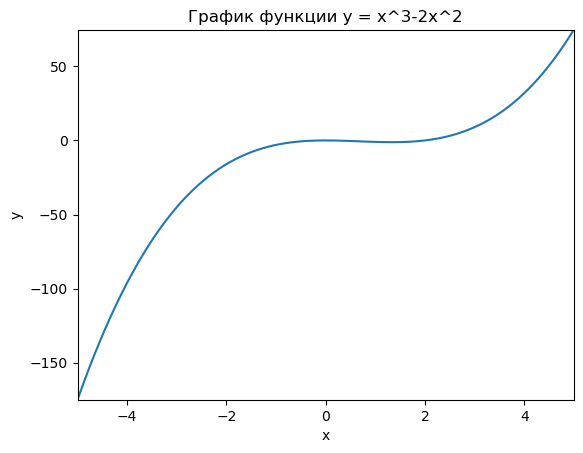

In [448]:
import numpy as np
import matplotlib.pyplot as plt
x_list=np.arange(-5,5,0.01)
y_list=x_list**3-2*x_list**2
plt.figure()
plt.plot(x_list,y_list)
plt.xlim(x_list[0],x_list[-1])
plt.ylim(y_list[0],y_list[-1])
plt.xlabel('x'); plt.ylabel('y')
plt.title("График функции y = x^3-2x^2")

4.

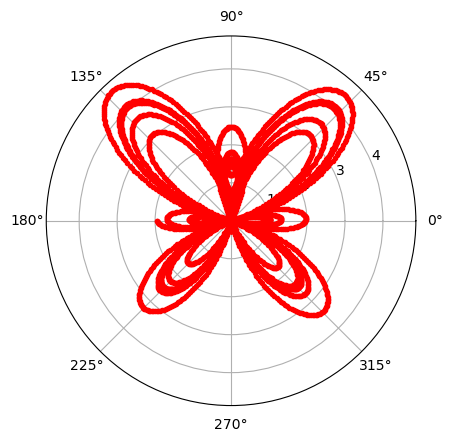

In [449]:
import numpy as np
import matplotlib.pyplot as plt
phi= np.arange(-6*np.pi, 6 * np.pi, 0.01)
plt.figure()
plt.axes(projection='polar')
r=np.exp(np.sin(phi)) - 2 * np.cos(4*phi) + np.sin((2*phi - np.pi) / 24)**5
plt.plot(phi + (r<0)*np.pi,abs(r),'r.')